In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, precision_recall_curve,roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [167]:
pd.options.display.max_columns=10

In [168]:
df=pd.read_csv("creditcard.csv")

In [169]:
df

,Time,V1,V2,V3,V4,...,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,...,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,...,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,...,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,...,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,...,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,...,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,...,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,...,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,...,0.546668,0.108821,0.104533,10.00,0


In [170]:
#plt.figure(figsize=(10,5))
#plt.title("V1-28 boxplots")
for v in df.drop(["Time","Amount","Class"],axis=1).columns:
    #sns.boxplot(df[v])
    print(v," min of: ", df[v].min(), " and max of: ", df[v].max())

V1  min of:  -56.407509631329  and max of:  2.45492999121121
V2  min of:  -72.7157275629303  and max of:  22.0577289904909
V3  min of:  -48.3255893623954  and max of:  9.38255843282114
V4  min of:  -5.68317119816995  and max of:  16.8753440335975
V5  min of:  -113.74330671114599  and max of:  34.8016658766686
V6  min of:  -26.1605059358433  and max of:  73.3016255459646
V7  min of:  -43.5572415712451  and max of:  120.589493945238
V8  min of:  -73.21671845526741  and max of:  20.0072083651213
V9  min of:  -13.4340663182301  and max of:  15.5949946071278
V10  min of:  -24.5882624372475  and max of:  23.7451361206545
V11  min of:  -4.79747346479757  and max of:  12.018913181619899
V12  min of:  -18.683714633344298  and max of:  7.8483920756445995
V13  min of:  -5.7918812063208405  and max of:  7.126882958593759
V14  min of:  -19.2143254902614  and max of:  10.5267660517847
V15  min of:  -4.49894467676621  and max of:  8.87774159774277
V16  min of:  -14.1298545174931  and max of:  17.3151

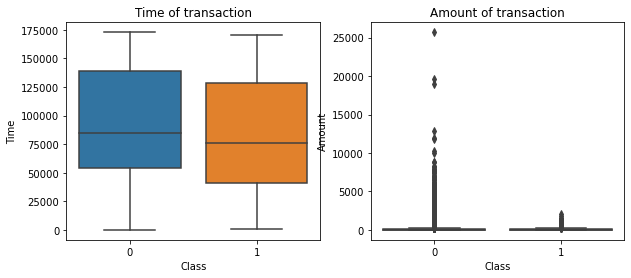

In [171]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Time of transaction")
sns.boxplot(x="Class",y="Time",data=df)
plt.subplot(1,2,2)
plt.title("Amount of transaction")
sns.boxplot(x="Class",y="Amount",data=df)
#df_pairplot=df[["Time","Amount","Class"]]
#sns.pairplot(df_pairplot,hue="Class",palette="husl",diag_kind="kde")
#plt.title("Transaction Time and Amount")

In [172]:
print("Number of non-fraud vs fraud transactions")
df["Class"].value_counts()

Number of non-fraud vs fraud transactions


0    284315
1       492
Name: Class, dtype: int64

In [173]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler=RobustScaler()

df["scaled_time"]=scaler.fit_transform(df["Time"].values.reshape(-1,1))
df["scaled_amount"]=scaler.fit_transform(df["Amount"].values.reshape(-1,1))

In [174]:
df.drop(["Time","Amount"],axis=1,inplace=True)

In [175]:
target=df.drop("Class",axis=1)
target=pd.DataFrame(scaler.fit_transform(target),columns=target.columns)
target=pd.concat([target,df["Class"]],axis=1)
target

,V1,V2,V3,V4,V5,...,V27,V28,scaled_time,scaled_amount,Class
0,-0.616237,-0.098602,1.228905,0.878152,-0.217859,...,0.816731,-0.246091,-0.994983,1.783274,0
1,0.524929,0.143100,-0.006970,0.293974,0.087726,...,-0.063781,0.026519,-0.994983,-0.269825,0
2,-0.615587,-1.002407,0.830932,0.251024,-0.344345,...,-0.350218,-0.540962,-0.994972,4.983721,0
3,-0.440239,-0.178789,0.841250,-0.529808,0.033775,...,0.379163,0.382611,-0.994972,1.418291,0
4,-0.526089,0.579239,0.713861,0.265632,-0.270695,...,1.347133,1.553716,-0.994960,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...
284802,-5.321622,7.135767,-5.222589,-1.285699,-4.073679,...,5.820867,6.190862,1.034951,-0.296653,0
284803,-0.335820,-0.085979,0.967471,-0.451476,0.707747,...,0.414680,-0.493534,1.034963,0.038986,0
284804,0.850377,-0.261532,-1.788463,-0.337932,2.059687,...,0.019227,-0.288058,1.034975,0.641096,0
284805,-0.115629,0.331602,0.272567,0.445763,-0.248270,...,0.663921,0.710829,1.034975,-0.167680,0


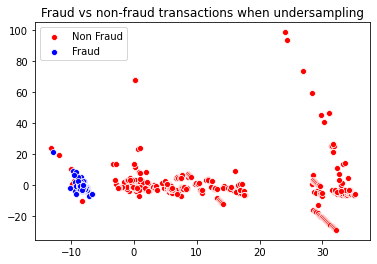

In [176]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
y=target["Class"]
X=target.drop("Class",axis=1)
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

mask=y_res==0
pca=PCA(n_components=2)
plot_points=pca.fit_transform(X_res)
sns.scatterplot(x=plot_points[~mask,0],y=plot_points[~mask,1],color="r")
sns.scatterplot(x=plot_points[mask,0],y=plot_points[mask,1],color="b")
plt.title("Fraud vs non-fraud transactions when undersampling")
plt.legend(["Non Fraud","Fraud"])

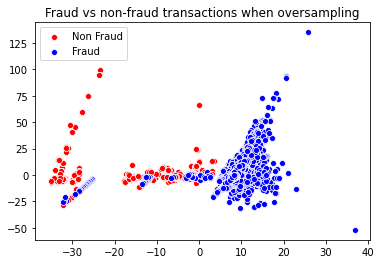

In [177]:
from imblearn.over_sampling import RandomOverSampler
y=target["Class"]
X=target.drop("Class",axis=1)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

mask=y_res==0
pca=PCA(n_components=2)
plot_points=pca.fit_transform(X_res)
sns.scatterplot(x=plot_points[~mask,0],y=plot_points[~mask,1],color="r")
sns.scatterplot(x=plot_points[mask,0],y=plot_points[mask,1],color="b")
plt.title("Fraud vs non-fraud transactions when oversampling")
plt.legend(["Non Fraud","Fraud"])

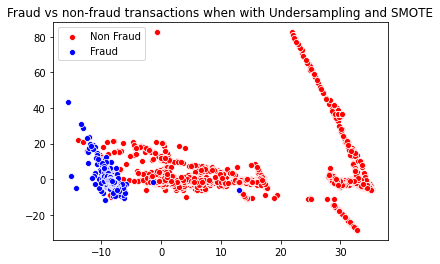

In [178]:
from imblearn.over_sampling import SMOTE
y=target["Class"]
X=target.drop("Class",axis=1)
rus = RandomUnderSampler(random_state=42,sampling_strategy=0.1)
sm = SMOTE(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
X_res, y_res = sm.fit_resample(X_res, y_res)

mask=y_res==0
pca=PCA(n_components=2)
plot_points=pca.fit_transform(X_res)
sns.scatterplot(x=plot_points[~mask,0],y=plot_points[~mask,1],color="r")
sns.scatterplot(x=plot_points[mask,0],y=plot_points[mask,1],color="b")
plt.title("Fraud vs non-fraud transactions when with Undersampling and SMOTE")
plt.legend(["Non Fraud","Fraud"])

In [179]:
new_df=pd.concat([X_res,y_res],axis=1).sample(frac=1).reset_index(drop=True)
mask=new_df["Class"]==0

In [180]:
X_res

,V1,V2,V3,V4,V5,...,V26,V27,V28,scaled_time,scaled_amount
0,0.579795,0.374504,-0.441415,0.462575,0.273347,...,0.795186,-0.220300,0.155811,-0.026340,-0.296793
1,-0.365284,0.798423,0.377929,0.448768,0.209721,...,-0.577385,-2.454664,-0.945937,-0.401062,-0.249004
2,-0.183021,-0.221801,0.491368,-0.809607,-0.449210,...,0.106067,1.003023,1.739855,-0.347361,-0.097813
3,-0.035067,0.712848,-0.608725,-0.006106,0.176991,...,-0.172812,-0.154283,0.236863,0.374534,0.489066
4,0.818565,0.219557,0.046635,2.441162,0.109241,...,0.054251,-0.130741,-0.410894,0.067458,-0.307413
...,...,...,...,...,...,...,...,...,...,...,...
9835,-1.237644,0.456909,-0.829616,0.944074,-0.869513,...,2.114229,-7.168906,6.121577,-0.275015,1.149874
9836,-1.287513,0.509390,-2.457315,1.899460,-1.983260,...,-0.115942,5.938204,2.186227,0.143219,7.254528
9837,-7.659915,6.959946,-12.557039,7.436030,-7.598266,...,1.280130,12.984036,-10.926341,-0.746200,-0.293440
9838,-0.002939,0.694772,0.145631,1.408597,0.167823,...,0.572367,0.589264,1.724535,-0.151830,-0.215669


In [181]:
pd.DataFrame(abs(new_df.corr()["Class"])).sort_values(by="Class",ascending=False)[1:13]

,Class
V14,0.761464
V4,0.712715
V11,0.701369
V12,0.685719
V10,0.639599
V16,0.601497
V9,0.571129
V17,0.570199
V3,0.562820
V2,0.504833


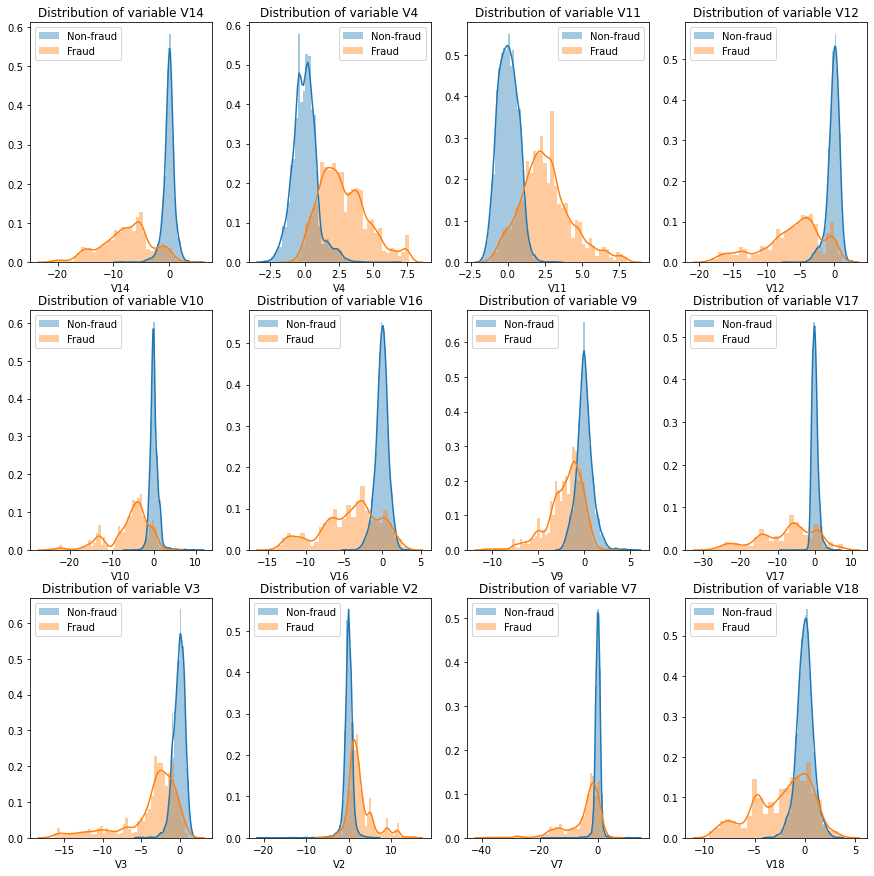

In [182]:
top_features=abs(new_df.corr()["Class"]).sort_values(ascending=False)[1:13].index
plt.figure(figsize=(15,15))

x=1
for feature in top_features:
    plt.subplot(3,4,x)
    sns.distplot(new_df[mask][feature])
    sns.distplot(new_df[~mask][feature])
    plt.legend(["Non-fraud","Fraud"])
    plt.title(f'Distribution of variable {feature}')
    x+=1

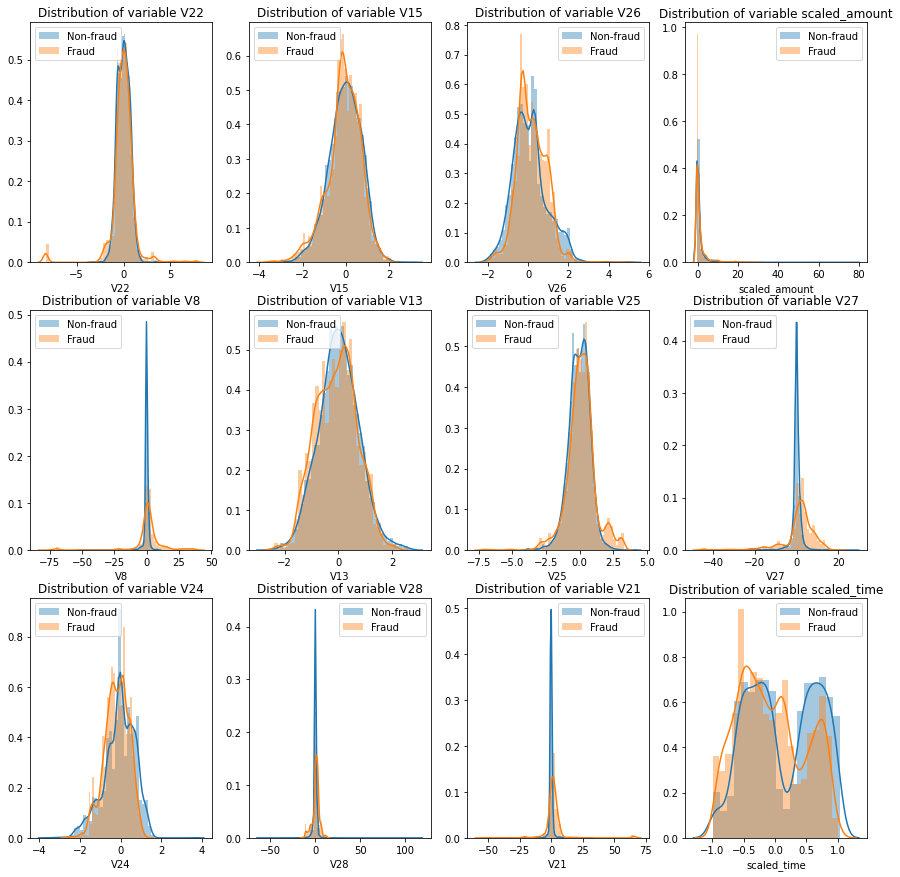

In [183]:
top_features=abs(new_df.corr()["Class"]).sort_values(ascending=True)[1:13].index
plt.figure(figsize=(15,15))
x=1
for feature in top_features:
    plt.subplot(3,4,x)
    sns.distplot(new_df[mask][feature])
    sns.distplot(new_df[~mask][feature])
    plt.legend(["Non-fraud","Fraud"])
    plt.title(f'Distribution of variable {feature}')
    x+=1

In [184]:
from sklearn.feature_selection import SelectKBest, chi2
kbest=SelectKBest(k='all')
X_reduced=kbest.fit_transform(X_res,y_res)
best_features= pd.DataFrame(kbest.scores_,X_res.columns).sort_values(by=0,ascending=False)

(<matplotlib.axes._subplots.AxesSubplot at 0x1c5721f05c8>,
 Text(0.5, 1.0, 'Feature score vs target'))

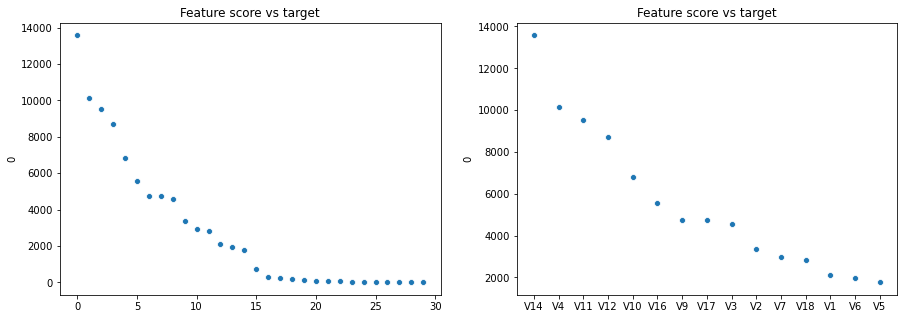

In [185]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(range(len(best_features.index)),best_features[0]),plt.title("Feature score vs target")
plt.subplot(1,2,2)

sns.scatterplot(best_features[best_features[0]>1000].index,best_features[best_features[0]>1000][0]),plt.title("Feature score vs target")

In [186]:

new_df=df.sample(frac=1)
nfraud=len(new_df[new_df["Class"]==1])
clean_df=new_df[new_df["Class"]==0][:nfraud]
fraud_df=new_df[new_df["Class"]==1]
new_df=pd.concat([clean_df,fraud_df])
new_df = new_df.sample(frac=1, random_state=42)

In [187]:
new_df

,V1,V2,V3,V4,V5,...,V27,V28,Class,scaled_time,scaled_amount
140786,-0.433222,2.428379,-3.996454,4.871299,-1.796308,...,1.094533,0.541148,1,-0.008905,-0.293440
74072,1.010050,-0.476833,1.826221,2.930597,-1.174913,...,0.073908,0.036178,0,-0.343977,0.417243
141260,-1.927453,1.827621,-7.019495,5.348303,-2.739188,...,1.277707,0.819081,1,-0.005733,6.850416
130844,-1.013693,-0.207730,2.518244,-1.011532,-0.404758,...,-0.233939,-0.169687,0,-0.061655,1.454901
33833,-0.815373,0.570236,1.231694,0.468138,-0.068280,...,0.470646,0.124642,0,-0.555528,1.179627
...,...,...,...,...,...,...,...,...,...,...,...
75738,0.578717,-1.169602,0.403535,0.660206,-1.061896,...,-0.082835,0.061994,0,-0.334391,4.345700
98183,-0.519183,0.374351,0.926500,-1.464816,-0.257277,...,-0.072139,-0.019770,0,-0.213078,0.740166
146790,-1.360293,-0.458069,-0.700404,2.737229,-1.005106,...,-0.469800,-1.495006,1,0.037489,11.282191
224017,2.014068,-0.127731,-1.013086,0.326011,-0.169981,...,-0.077162,-0.070257,0,0.692290,-0.293579


In [188]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate

kbest=SelectKBest(k=15)
X_reduced=kbest.fit_transform(X_res,y_res)

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y_res,test_size=0.2,random_state=42)
classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "K Nearest Neighbours": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

base_scores=pd.DataFrame(columns=["Training score","Testing score"],index=classifiers.keys())

for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score=cross_validate(classifier,X_train,y_train,scoring="roc_auc")['test_score'].mean()
    testing_score=roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1])
    base_scores.loc[key,'Training score']=training_score
    base_scores.loc[key,'Testing score']=testing_score
    #print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [286]:
base_scores

,Training score,Testing score
Logisitic Regression,0.984929,0.98825
K Nearest Neighbours,0.99477,0.995593
Support Vector Classifier,0.986628,0.991142
Decision Tree Classifier,0.956371,0.96517


Text(0.5, 1.0, 'Logistic Regression performance on re-sampled test data')

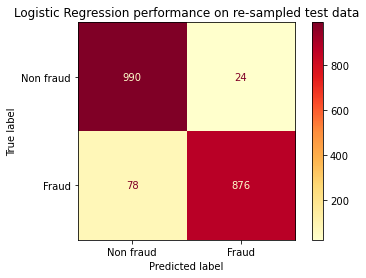

In [189]:
from sklearn.metrics import plot_confusion_matrix

lr=LogisticRegression()
lr.fit(X_train,y_train)

disp=plot_confusion_matrix(lr,X_test,y_test,display_labels=["Non fraud","Fraud"],cmap=plt.cm.YlOrRd)
disp.ax_.set_title("Logistic Regression performance on re-sampled test data")



Text(0.5, 1.0, 'Logistic Regression performance on re-sampled training data')

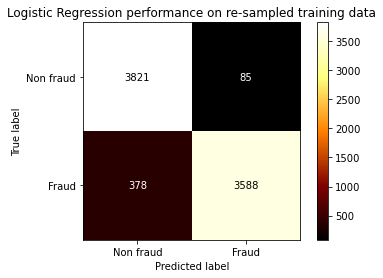

In [190]:
disp=plot_confusion_matrix(lr,X_train,y_train,display_labels=["Non fraud","Fraud"],cmap=plt.cm.afmhot)
disp.ax_.set_title("Logistic Regression performance on re-sampled training data")

Text(0.5, 1.0, 'Logistic Regression performance on original data')

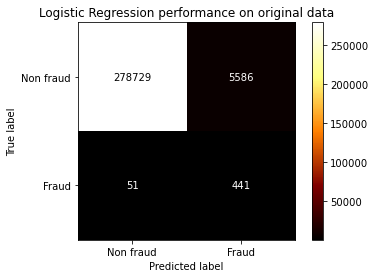

In [191]:
X_final=kbest.transform(X)
disp=plot_confusion_matrix(lr,X_final,y,display_labels=["Non fraud","Fraud"],cmap=plt.cm.afmhot)
disp.ax_.set_title("Logistic Regression performance on original data")

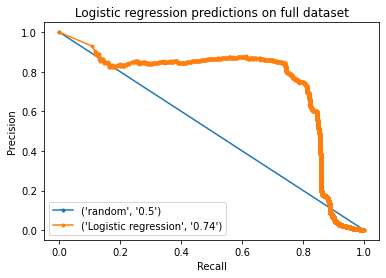

0.7364873282046848

In [285]:
# plot the no skill precision-recall curve
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier(strategy='prior')
dummy.fit(X_train,y_train)
precision, recall, _ = precision_recall_curve(y, dummy.predict_proba(X_final)[:,1])
plt.plot(recall, precision, marker='.', label=('random',str(round(auc(recall,precision),2))))


precision, recall, _ = precision_recall_curve(y, lr.predict_proba(X_final)[:,1])
plt.plot(recall, precision, marker='.', label=('Logistic regression',str(round(auc(recall,precision),2))))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Logistic regression predictions on full dataset")
# show the legend
plt.legend()
# show the plot
plt.show()
auc(recall,precision)

In [334]:
knn=KNeighborsClassifier(n_neighbors=2,algorithm='ball_tree')
knn.fit(X_train,y_train)
svc=SVC(probability=True,kernel='linear',C=50)
svc.fit(X_train,y_train)
dtr=DecisionTreeClassifier(max_depth=16)
dtr.fit(X_train,y_train)

#disp=plot_confusion_matrix(svc,X_test,y_test,display_labels=["Non fraud","Fraud"],cmap=plt.cm.YlOrRd)
#disp.ax_.set_title("Support Vector Classification performance on re-sampled test data")

#disp=plot_confusion_matrix(knn,X_test,y_test,display_labels=["Non fraud","Fraud"],cmap=plt.cm.YlOrRd)
#disp.ax_.set_title("K Nearest Neighbours performance on re-sampled test data")


DecisionTreeClassifier(max_depth=16)

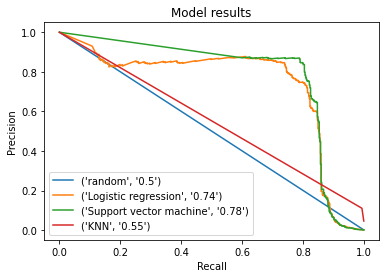

0.552610908913862

In [335]:
precision, recall, _ = precision_recall_curve(y, dummy.predict_proba(X_final)[:,1])
plt.plot(recall, precision, label=('random',str(round(auc(recall,precision),2))))


precision, recall, _ = precision_recall_curve(y, lr.predict_proba(X_final)[:,1])
plt.plot(recall, precision, label=('Logistic regression',str(round(auc(recall,precision),2))))


precision, recall, _ = precision_recall_curve(y, svc.predict_proba(X_final)[:,1])
plt.plot(recall, precision, label=('Support vector machine',str(round(auc(recall,precision),2))))

precision, recall, _ = precision_recall_curve(y, knn.predict_proba(X_final)[:,1])
plt.plot(recall, precision, label=('KNN',str(round(auc(recall,precision),2))))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Model results")
# show the legend
plt.legend()
# show the plot
plt.show()
auc(recall,precision)

Text(0.5, 1.0, 'SVC')

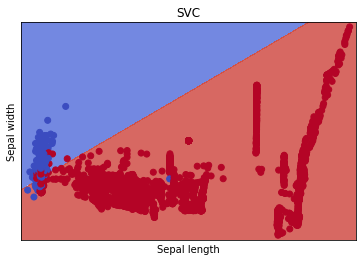

In [346]:
X_plot=pca.fit_transform(X)
X_plot_train=pca.fit_transform(X_train)

h = .02
x_min, x_max = X_plot_train[:, 0].min() - 1, X_plot_train[:, 0].max() + 1
y_min, y_max = X_plot_train[:, 1].min() - 1, X_plot_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


svc.fit(X_plot_train,y_train)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_plot_train[:, 0], X_plot_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("SVC")

ValueError: X.shape[1] = 2 should be equal to 15, the number of features at training time

In [17]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,Y_train)
log_reg=grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, Y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, Y_train)

svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, Y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


In [18]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, Y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, Y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, Y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, Y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.14%
Knears Neighbors Cross Validation Score 92.97%
Support Vector Classifier Cross Validation Score 94.27%
DecisionTree Classifier Cross Validation Score 91.8%


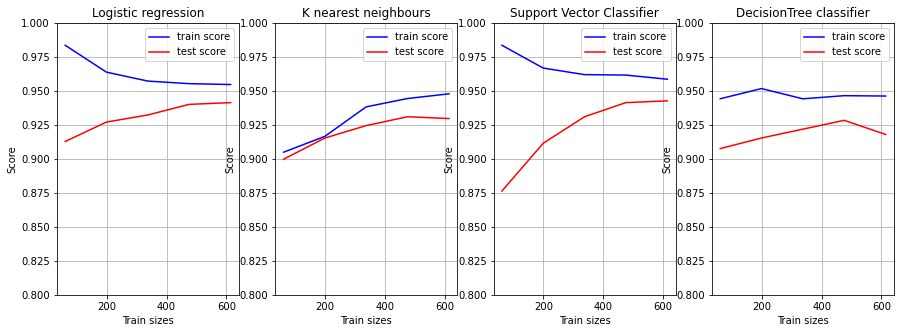

In [19]:
from sklearn.model_selection import learning_curve
models={"Logistic regression": log_reg,"K nearest neighbours": knears_neighbors,"Support Vector Classifier":
        svc,"DecisionTree classifier":tree_clf}
x=1
plt.figure(figsize=(15,5))
for key, model in models.items():
    train_sizes, train_scores, test_scores=learning_curve(model,X_train,Y_train)
    plt.subplot(1,4,x)
    plt.plot(train_sizes,train_scores.mean(axis=1),color="b",label="train score")
    plt.plot(train_sizes,test_scores.mean(axis=1),color="r",label="test score")
    plt.xlabel("Train sizes"),plt.ylabel("Score"),plt.grid(True),plt.legend(loc="best"),plt.ylim((0.8,1)),plt.title(key)

    x=x+1

(Text(0.5, 0, 'False Positive Rate'), Text(0, 0.5, 'True Positive Rate'))

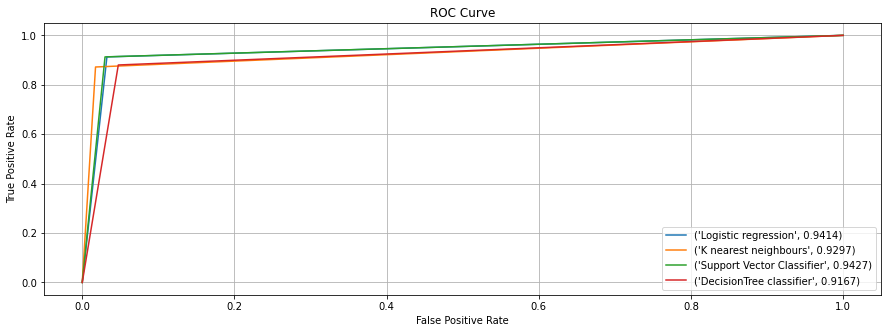

In [20]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


plt.figure(figsize=(15,5))
for key, model in models.items():
    
    Y_predict=cross_val_predict(model,X_train,Y_train)
    fpr,tpr,thresholds=roc_curve(Y_train,Y_predict)
    plt.plot(fpr,tpr,label=(key,round(cross_val_score(model, X_train, Y_train).mean(),4)))
plt.legend(loc="best"),plt.grid(True), plt.title("ROC Curve")
plt.xlabel('False Positive Rate', fontsize=10), plt.ylabel('True Positive Rate', fontsize=10)
    

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
Y_ave=pd.DataFrame()

for key, model in models.items():
    Y_ave[key]=cross_val_predict(model,X_train,Y_train)
    print(f'{key} R2 is: ' + str(round(accuracy_score(Y_train,Y_ave[key]),3)))
Y_ave["Average"]=Y_ave.mean(axis=1)
Y_ave["predict"]=Y_ave["Average"].map(lambda x: 1 if x>=0.5 else 0)

print("R2 for averaged models is: ", str(round(accuracy_score(Y_train,Y_ave["predict"]),3)))

Logistic regression R2 is: 0.941
K nearest neighbours R2 is: 0.93
Support Vector Classifier R2 is: 0.943
DecisionTree classifier R2 is: 0.918
R2 for averaged models is:  0.94


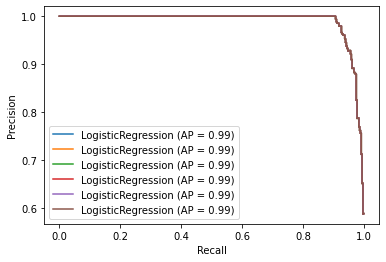

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
C=[0.01,0.1,1,10,100,1000]

fig,ax=plt.subplots()
for c in C:
    lr=LogisticRegression(class_weight={0:1,1:c})
    lr.fit(X_train,Y_train)
    pred_prob=log_reg.predict_proba(X_test)[:,1]
    precision_recall_curve(Y_test,pred_prob)
    plot_precision_recall_curve(log_reg,X_train,Y_train,response_method='predict_proba',ax=ax)

In [24]:
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('Logistic regression', log_reg), ("K nearest neighbours", knears_neighbors),
                                     ("Support Vector Classifier",svc),
                                    ("DecisionTree classifier",tree_clf)], voting='hard')

models={"Logistic regression": log_reg,"K nearest neighbours": knears_neighbors,"Support Vector Classifier":
        svc,"DecisionTree classifier":tree_clf,"Voting":voter}

In [50]:
full_X=df.drop("Class",axis=1)
full_Y=df["Class"]
model_scores=pd.DataFrame(columns=["ROC_AUC score"], index=models.keys())

for key,model in models.items():
    model.fit(X_train,Y_train)
    pred=model.predict(full_X)
    score=roc_auc_score(full_Y,pred)
    model_scores.loc[key]=score


In [51]:
model_scores

,ROC_AUC score
Logistic regression,0.944217
K nearest neighbours,0.943585
Support Vector Classifier,0.945154
DecisionTree classifier,0.930703
Voting,0.945196
